In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

In [4]:
cities=pd.Series(cities)
long=pd.Series(lngs)
lat=pd.Series(lats)

city_data=pd.DataFrame({'city':cities,'Latitude':lat,'Longitude':long})
city_data["Temperature"] = ""
city_data["Humidity"] = ""
city_data["Cloudiness"] = ""
city_data["WindSpeed"] = ""

city_data=city_data.head(500)

## Perform API Calls

In [5]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={api_key}&params"


In [6]:
for index, row in city_data.iterrows():
    city=row['city']
    lat= row["Latitude"]
    long=row['Longitude']
  
    params= f"lat={lat}&lon={long}"

    response = requests.get(url, params=params).json()
    
    try:
        city_data.loc[index, "Temperature"] = response['main']['temp']
        city_data.loc[index, "Humidity"] =response['main']['humidity']
        city_data.loc[index, "Cloudiness"] = response['clouds']['all']
        city_data.loc[index, "WindSpeed"] =response['wind']['speed']
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")

In [9]:
city_data

,city,Latitude,Longitude,Temperature,Humidity,Cloudiness,WindSpeed
0,caravelas,-21.185263,-28.924346,72.05,100,12,11.88
1,arraial do cabo,-33.283679,-33.720115,61.97,100,92,18.37
2,severo-kurilsk,32.285573,165.703587,76.55,100,0,3.71
3,begun,25.105416,74.898809,79.34,52,0,4.16
4,keetmanshoop,-27.420532,17.790352,55.04,21,0,10.98
5,yellowknife,80.852749,-115.370297,21.74,91,88,11.77
6,barrow,79.625093,-146.507589,28.22,82,0,16.8
7,hobart,-83.172441,150.952255,-25.33,27,20,23.85
8,carnarvon,-32.537462,89.270001,56.66,100,92,5.84
9,grants,34.521849,-107.722088,55.04,75,0,3.04


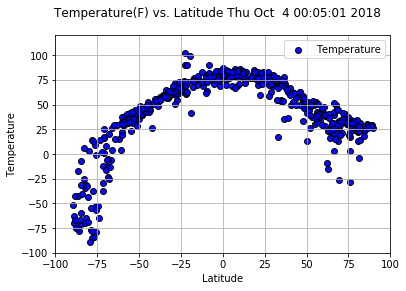

<Figure size 432x288 with 0 Axes>

In [10]:
plt.suptitle(f'Temperature(F) vs. Latitude {time.ctime()}')
plt.scatter(city_data['Latitude'],city_data['Temperature'],alpha=0.95,c='b',edgecolor = 'black', label = 'Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.ylim(-100,120)
plt.xlim(-100,100)
plt.legend()
plt.grid()
plt.show()

plt.savefig('TempVsLatitude.png')

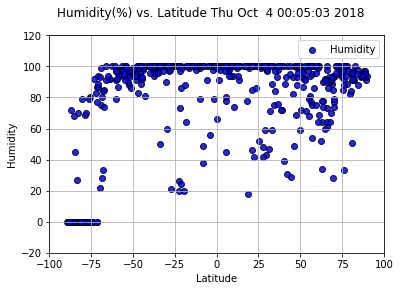

<Figure size 432x288 with 0 Axes>

In [11]:
plt.suptitle(f'Humidity(%) vs. Latitude {time.ctime()}')
plt.scatter(city_data['Latitude'],city_data['Humidity'],alpha=0.85,c='b',edgecolor = 'black', label = 'Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.ylim(-20,120)
plt.xlim(-100,100)
plt.legend()
plt.grid()
plt.show()

plt.savefig('HumidityVsLatitude.png')

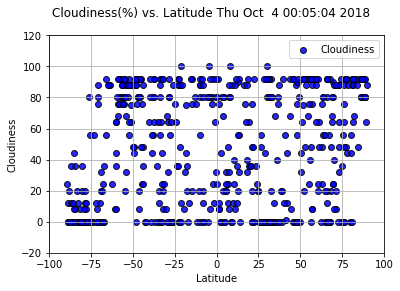

<Figure size 432x288 with 0 Axes>

In [12]:
plt.suptitle(f'Cloudiness(%) vs. Latitude {time.ctime()}')
plt.scatter(city_data['Latitude'],city_data['Cloudiness'],alpha=0.85,c='b',edgecolor = 'black', label = 'Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.ylim(-20,120)
plt.xlim(-100,100)
plt.legend()
plt.grid()
plt.show()

plt.savefig('CloudinessVsLatitude.png')

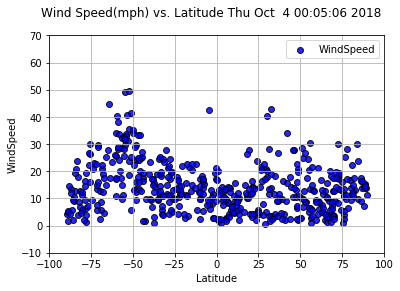

<Figure size 432x288 with 0 Axes>

In [13]:
plt.suptitle(f'Wind Speed(mph) vs. Latitude {time.ctime()}')
plt.scatter(city_data['Latitude'],city_data['WindSpeed'],alpha=0.85,c='b',edgecolor = 'black', label = 'WindSpeed')
plt.xlabel('Latitude')
plt.ylabel('WindSpeed')
plt.ylim(-10,70)
plt.xlim(-100,100)
plt.legend()
plt.grid()
plt.show()

plt.savefig('WindSpeedVsLatitude.png')
